In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
""""
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)
"""

'"\n1 - age (numeric)\n2 - job : type of job (categorical: \'admin.\',\'blue-collar\',\'entrepreneur\',\'housemaid\',\'management\',\'retired\',\'self-employed\',\'services\',\'student\',\'technician\',\'unemployed\',\'unknown\')\n3 - marital : marital status (categorical: \'divorced\',\'married\',\'single\',\'unknown\'; note: \'divorced\' means divorced or widowed)\n4 - education (categorical: \'basic.4y\',\'basic.6y\',\'basic.9y\',\'high.school\',\'illiterate\',\'professional.course\',\'university.degree\',\'unknown\')\n5 - default: has credit in default? (categorical: \'no\',\'yes\',\'unknown\')\n6 - housing: has housing loan? (categorical: \'no\',\'yes\',\'unknown\')\n7 - loan: has personal loan? (categorical: \'no\',\'yes\',\'unknown\')\n# related with the last contact of the current campaign:\n8 - contact: contact communication type (categorical: \'cellular\',\'telephone\')\n9 - month: last contact month of year (categorical: \'jan\', \'feb\', \'mar\', ..., \'nov\', \'dec\')\n10 

In [35]:
bank = pd.read_csv('./data/bank.csv', sep=';')
bank.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,...,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


In [36]:
bank.shape

(4119, 21)

In [37]:
# Valores nulos?
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [38]:
# listar colunas
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [39]:
# converter "y" para valores numéricos e salvar em uma coluna com nome "outcome"
bank['outcome'] = bank.y.map({'no': 0, 'yes': 1})
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,outcome
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0


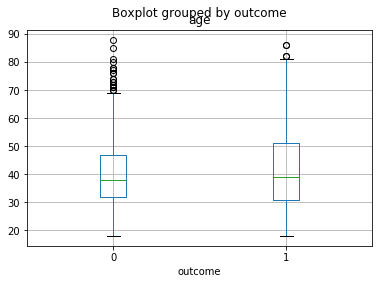

In [40]:
# boxplot da idade discriminado pelo outcome. 
bank.boxplot(column = 'age', by = 'outcome')

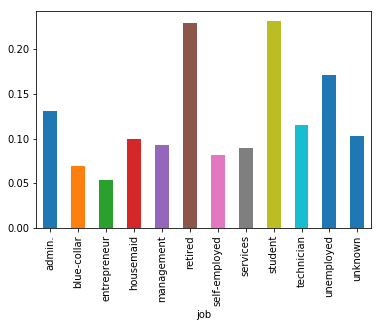

In [41]:
#Plot de barras com a porcentagem de sucesso para cada profissão
bank.groupby('job').outcome.mean().plot(kind='bar')

In [42]:
#Criar dummys para jobs
job_dummies = pd.get_dummies(bank.job, prefix = 'jobs')
job_dummies.head()

,jobs_admin.,jobs_blue-collar,jobs_entrepreneur,jobs_housemaid,jobs_management,jobs_retired,jobs_self-employed,jobs_services,jobs_student,jobs_technician,jobs_unemployed,jobs_unknown
0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


In [43]:
job_dummies.drop(job_dummies.columns[0], axis =1, inplace=True)
job_dummies.head()

,jobs_blue-collar,jobs_entrepreneur,jobs_housemaid,jobs_management,jobs_retired,jobs_self-employed,jobs_services,jobs_student,jobs_technician,jobs_unemployed,jobs_unknown
0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


no         3315
unknown     803
yes           1
Name: default, dtype: int64

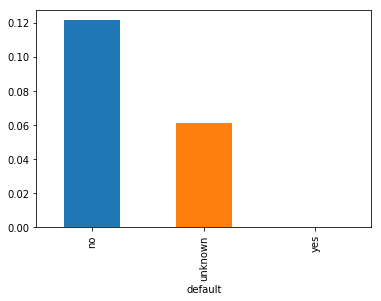

In [44]:
#Plot de barras com a porcentagem de sucesso para cada situação de default. 
#Quantas pessoas se encontram em cada situação?
bank.groupby('default').outcome.mean().plot(kind = 'bar')
bank.default.value_counts()

In [45]:
#Transformar default em números
bank['default'] = bank.default.map({'no': 0, 'yes': 1, 'unknown': 1})
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,outcome
0,30,blue-collar,married,basic.9y,0,yes,no,cellular,may,fri,...,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,0
1,39,services,single,high.school,0,no,no,telephone,may,fri,...,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0
2,25,services,married,high.school,0,yes,no,telephone,jun,wed,...,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,0
3,38,services,married,basic.9y,0,unknown,unknown,telephone,jun,fri,...,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0
4,47,admin.,married,university.degree,0,yes,no,cellular,nov,mon,...,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0


In [47]:
#Média de sucesso baseado no tipo de contato. Converter tipos de contatos para números
bank.groupby('contact').outcome.mean()
bank['contact'] = bank.contact.map({'telephone': 0, 'cellular': 1})
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,outcome
0,30,blue-collar,married,basic.9y,0,yes,no,1,may,fri,...,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,0
1,39,services,single,high.school,0,no,no,0,may,fri,...,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0
2,25,services,married,high.school,0,yes,no,0,jun,wed,...,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,0
3,38,services,married,basic.9y,0,unknown,unknown,0,jun,fri,...,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0
4,47,admin.,married,university.degree,0,yes,no,1,nov,mon,...,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0


In [48]:
#Média de sucesso baseado no poutcome
bank.groupby('poutcome').outcome.mean()

poutcome
failure        0.147577
nonexistent    0.082884
success        0.647887
Name: outcome, dtype: float64

In [51]:
# criar poutcome_dummies
poutcome_dummies = pd.get_dummies(bank.poutcome, prefix = 'poutcome')
poutcome_dummies.drop(poutcome_dummies.columns[0], axis =1, inplace=True)
poutcome_dummies.head()

,poutcome_nonexistent,poutcome_success
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [52]:
# concatenar dataframes
bank = pd.concat([bank, job_dummies, poutcome_dummies], axis = 1)
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,jobs_management,jobs_retired,jobs_self-employed,jobs_services,jobs_student,jobs_technician,jobs_unemployed,jobs_unknown,poutcome_nonexistent,poutcome_success
0,30,blue-collar,married,basic.9y,0,yes,no,1,may,fri,...,0,0,0,0,0,0,0,0,1,0
1,39,services,single,high.school,0,no,no,0,may,fri,...,0,0,0,1,0,0,0,0,1,0
2,25,services,married,high.school,0,yes,no,0,jun,wed,...,0,0,0,1,0,0,0,0,1,0
3,38,services,married,basic.9y,0,unknown,unknown,0,jun,fri,...,0,0,0,1,0,0,0,0,1,0
4,47,admin.,married,university.degree,0,yes,no,1,nov,mon,...,0,0,0,0,0,0,0,0,1,0


In [53]:
# nova lista de colunas
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'outcome',
       'jobs_blue-collar', 'jobs_entrepreneur', 'jobs_housemaid',
       'jobs_management', 'jobs_retired', 'jobs_self-employed',
       'jobs_services', 'jobs_student', 'jobs_technician', 'jobs_unemployed',
       'jobs_unknown', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [55]:
# criar X (['default', 'contact', 'previous', 'euribor3m'] + list(bank.columns[-13:]))
X = bank[['default', 'contact', 'previous', 'euribor3m'] + list(bank.columns[-13:])]
# criar y
y = bank.outcome
X.head()

,default,contact,previous,euribor3m,jobs_blue-collar,jobs_entrepreneur,jobs_housemaid,jobs_management,jobs_retired,jobs_self-employed,jobs_services,jobs_student,jobs_technician,jobs_unemployed,jobs_unknown,poutcome_nonexistent,poutcome_success
0,0,1,0,1.313,1,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,4.855,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,0,0,4.962,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0,0,0,4.959,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0,1,0,4.191,0,0,0,0,0,0,0,0,0,0,0,1,0


In [65]:
#KNN com grid_search entre 1-29
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': range(1,29,2)}
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=5, scoring = 'accuracy')
grid.fit(X,y)
print(grid.best_score_)

print(bank.outcome.mean())

0.9026462733673222
0.10949259529011895


In [67]:
1-bank.outcome.mean()

0.8905074047098811

In [62]:
print(grid.best_params_)

{'n_neighbors': 27}


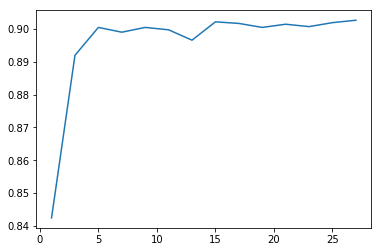

In [63]:
grid_mean_scores = [result[1] for result in grid.grid_scores_]
plt.figure()
plt.plot(range(1, 29, 2), grid_mean_scores)